# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no) do you get heart pain when you do exercise
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Set up 

In [1]:


# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook 
%matplotlib inline 

#model from scikit-learn look at map and choses
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


#model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay



## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #check row and columns

(303, 14)

In [70]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Finsd how many of each class in target,like 1= have haert disease 0 = no heart disease. base on info of dataset provide
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

This is balanced promblem = we have similar of examples in both classes 1,0 in target feature

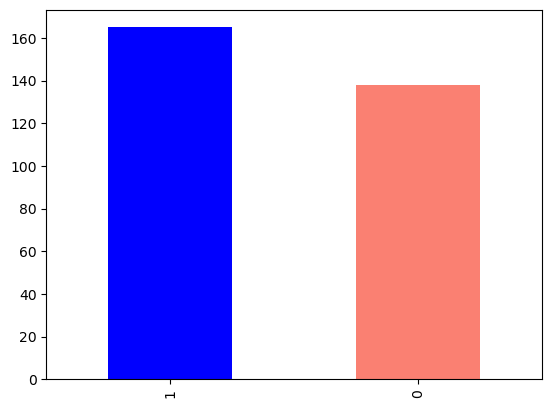

In [6]:
# Visualize classes or target 1, 0 to  plot 

df["target"].value_counts().plot(kind="bar",color=["blue","salmon"]);

In [7]:
#check if any missing values?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# check all numerical like mean min std values for our columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


How our feature relate to the target variable(target 0,1 in this projest mean find how feature relate to heart disease)


## Finding Patterns or expore to check data : Heart Disease Fequency according to Sex

this is compare sex attribute and target attribute

In [9]:
#cheack on sex value 

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


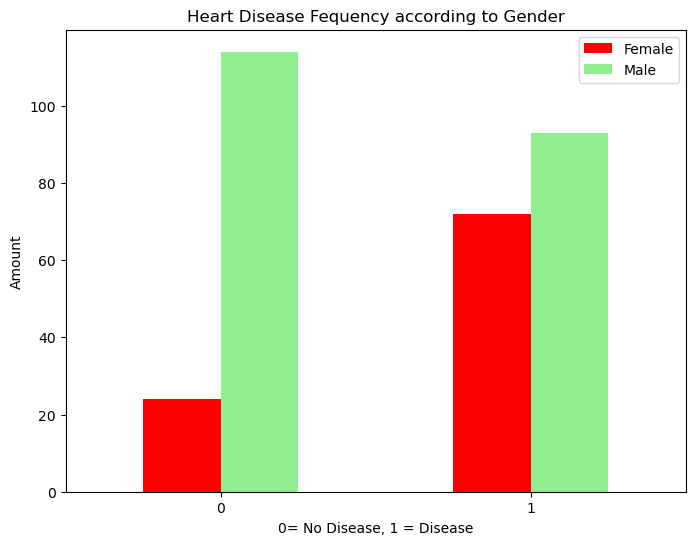

In [11]:
#create  a plot of crosstab

pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(8,6),
                                   color=["red","lightgreen"])
plt.title("Heart Disease Fequency according to Gender")
plt.xlabel("0= No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]) # decreip what is 0,1 in gender
plt.xticks(rotation=0);

In [12]:
# ****Plot graph with a lot of differrent value need to use Scatter graph!!!

df["thalach"].value_counts()# this one has Length :91 that mean 91 diferent values

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Explore to check :Age vs. Max Heart Rate  for Heart Disease 


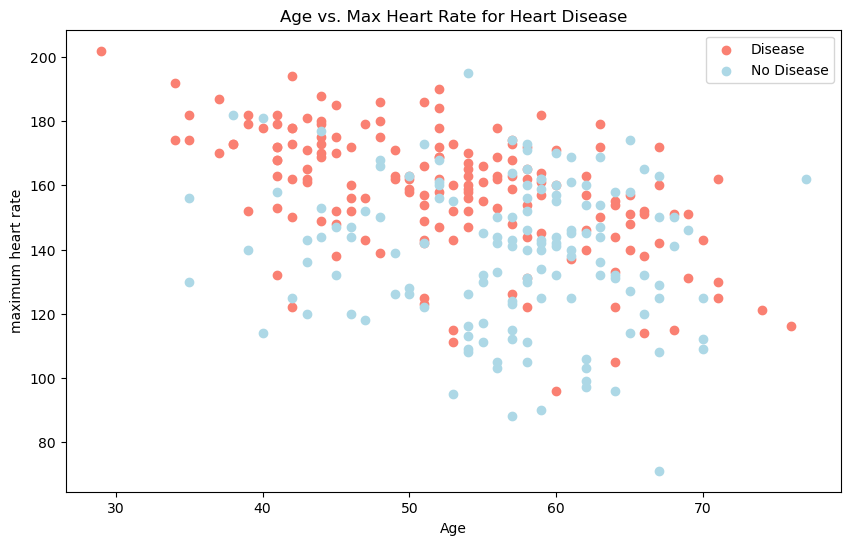

In [13]:
#Create another figure
plt.figure(figsize=(10,6))


#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1], #plot1 heart disease case in (thalach - maximum heart rate achieved column)
           c="salmon")

#Scatter with negative example

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")#plot 0 not heart desease case in (thalach - maximum heart rate achieved column)


# Add some helpful info
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("maximum heart rate")
plt.legend(["Disease","No Disease"]); #describ disease and no disease


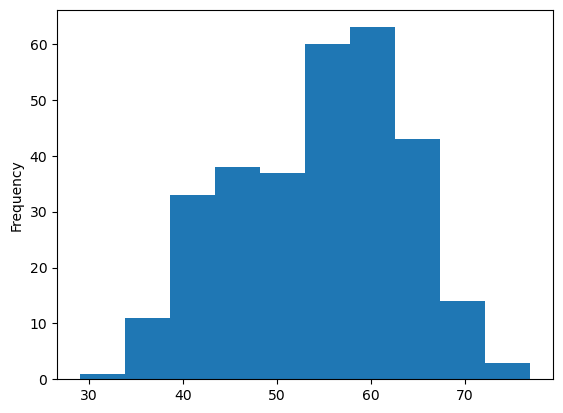

In [14]:
# Check the distribution of the age column witgh a histogram

# check and explo data, check all attricute if it normal , check spreads.and check if they have an **outline(outliers)
#outline เช่นมีคนอายุ 120 ,5 ,2ขวบในข้อมูล เราต้องเช็คthat outlier data than delate it before we start trianing data into model

df.age.plot.hist();

## Heart Disease fequency per chest pain type

cp - chest pain type:

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)อาการกระตุกของหลอดลมอาหาร
* 3: Asymptomatic: chest pain not showing signs of disease ไม่มีอาการ

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


* Some data that doesn’t make sense for us we need toreach out to make more clear about data set. as ask Professional or do research

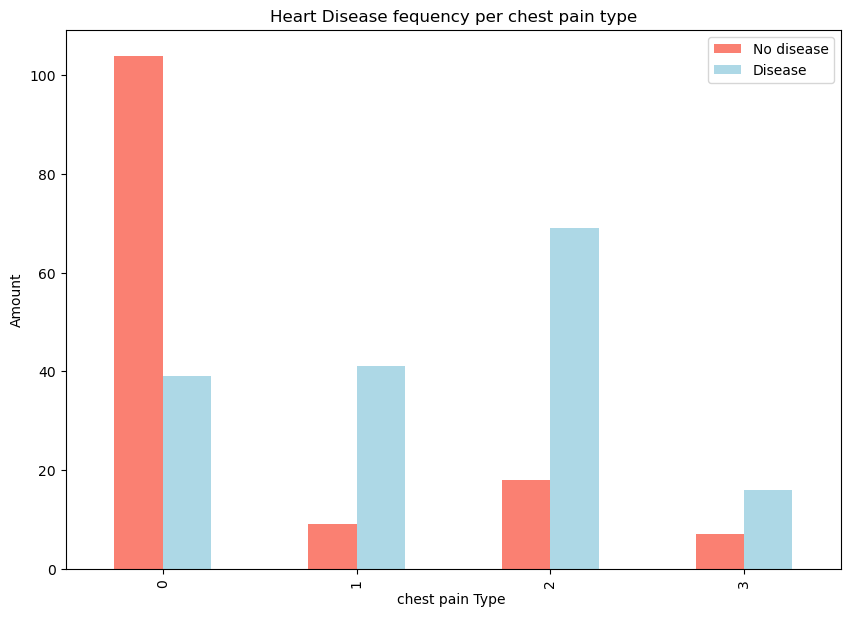

In [16]:
# Make the crosstab more visult


#1. We might do a bar plot because its only 4 diffrent value versus two diferrnt values
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,7),
                                  color=["salmon","lightblue"])

# Add some communication

plt.title("Heart Disease fequency per chest pain type")
plt.xlabel("chest pain Type ")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])


## Check the correlation between independent variable


how strong and in what direction two or more variables are related. 


In [17]:
# Make correlation by .corr()

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Note: *Nagative correlation ถ้าเป็นลบ = relationship between two varaibles in which one variable increase as the other decrease ความสัมพันตรงข้ามกัน

- A higher positive value means a potential positivr correlation

- higher negative value mean potential negative correlation or a decrease

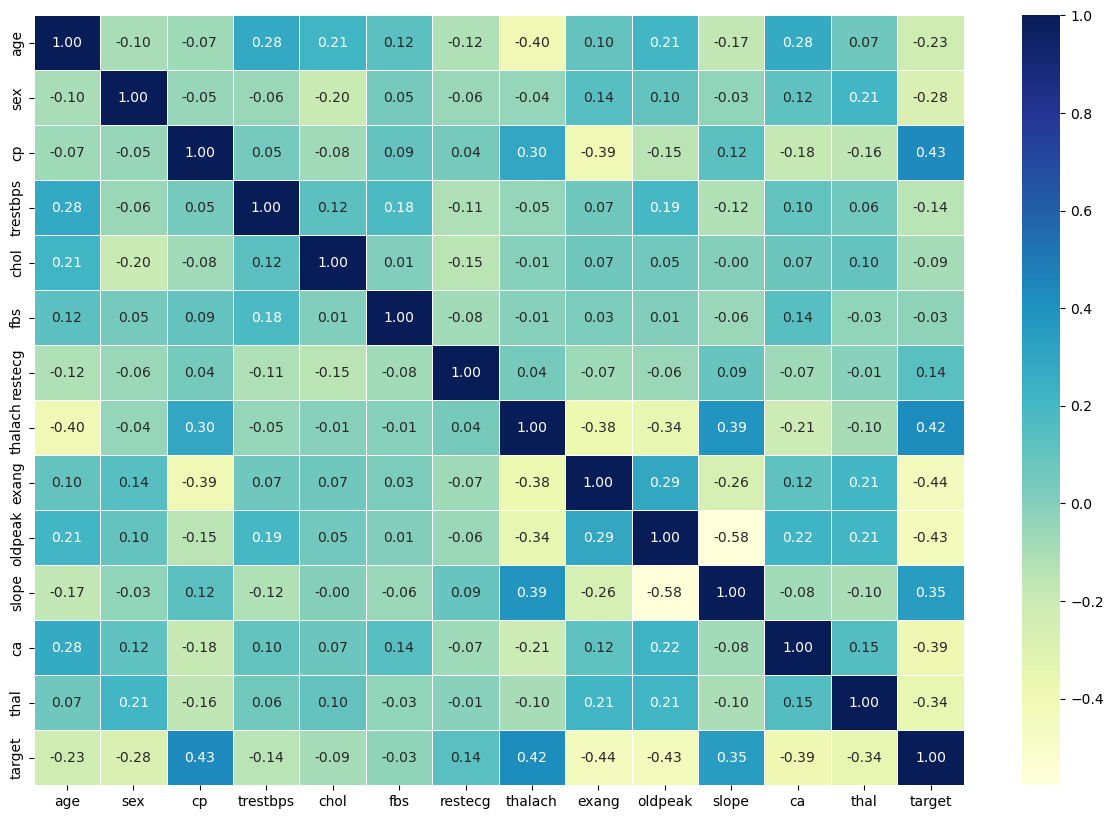

In [18]:
# Let's make our correlation matrix a little prettier from plot scratch workflow
#Correlation plot by use sns.heatmap()


#step 1 Set up

fig, ax =plt.subplots(figsize=(15,10))

# step 2 assigned matrix
corr_matrix = df.corr()

# step 3 custome data
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",#only need 2 centimal
                cmap="YlGnBu");#color yellow,Green,Blue



# if table not fit well or cut off use this code to fix. sklearn version1.2 normal no promblem
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5,top - 0.5)



Note: *Nagative correlation  = relationship between two varaibles in which one variable increase as the other decrease 

- A higher positive value means a potential positivr correlation

- higher negative value mean potential negative correlation or a decrease

# 5. Modeling

In [19]:
#cheack data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# We use all the columns try to predict a "target" columns. ( independent variables to predict the dependent variable)

# step 1 split our data into X and Y(No need to import all model since we all did that for the beginning)

x = df.drop("target",axis=1) # we drop target because we try to find it
y = df["target"]

# step 2 split data into train and test set

np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.2)

In [21]:
# check after shuffle
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3




# Set up a little dictionary with all our models in it and create funtion

In this case we use: Classification
- ******Logistic Regression(not in sklearn map)
- K-Nearest Neighbours Classifier
- Random Forest Classifier

In [22]:
# 1. Put models in dictionary

models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#2. Create a funtion to fit and score models. Add some note for us and team to understand it

def fit_and_score(models,x_train,x_test,y_train,y_test): #afrer def we can create any name that simple,but it will take our dictionary of model and x,y train x,ytest
    
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learning machine learning models.
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels 
    y_test : test labels
    
    """
#Set random seed
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items(): 
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [23]:
# Evaluate Modle by one hit:

#Call our funtion from =3. and fit and score from # 2.
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores



/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

This is how each models perform as baseline class in our test and without turnin

#### Model score result Comparison

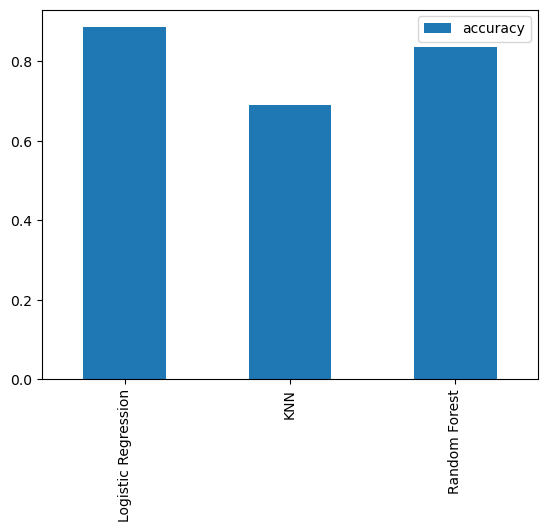

In [24]:
# Put the score from result to dataframe and visual it

model_compare = pd.DataFrame(model_scores,index=["accuracy"])# accuracy because our model was Classification (default score is accuracy )
model_compare.T.plot.bar();# T=transpose it to plot to make it loo better. we can also undo T

`**To tell and infrom team** : base on first evaluate ,the best algorithm for the predicting heart disease is logistic regression. We migth need to drop KNN since it low perfromance. Now we can start turning and find the "high parameter in a turning"**`

### After got baseline Model, and model's first prediction aren't alway what we should based our next step off. Next step that we should do


# Look at the Classificatio Following:

- Hypyterparameter turning
- Feature importance
- Confusion matrix
- Cross-validation
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve(AUC)


# Hypyterparameter turning ( by hand ) with "for loop" Workflow

we use Loop when we have a lot parameter instead of turn one by one.Do this way we can turn more parameter at one time.

In [25]:
# Tune KNN, 

# so we want to compare differrent version of same model with differrent setting, (try with 20 differrent hyperrarameter)

train_scores = []
test_scores = []

#2. Create a list of different values for n_neighbors(parameter that we can adjust to get high score of evaluate)

neighbors = range(1,21) 
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

In [26]:
# Check the train_scores result on the # 1. that we. create

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
# Check on test_scores

test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


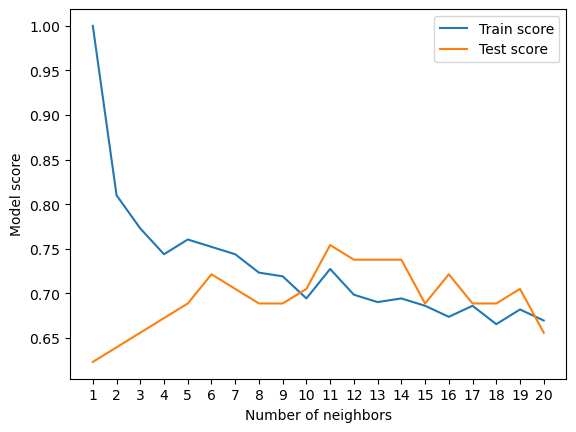

In [28]:
# Visualize train_score, test_score

plt.plot(neighbors,train_scores, label="Train score")# first graph x= neighbors,y = train_score
plt.plot(neighbors,test_scores, label="Test score")#secound graph x=neighbors, y= test_score
plt.xticks(range(1,21,1))#bring out list of range of 1 to 21 jumping by 1 each on x
plt.xlabel("Number of neighbors")# (neighbor=x,train_score=y) so  y = Model score
plt.ylabel("Model score")
plt.legend()

#Get a max test_score
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%") # its percentage because accuracy is in %

After we tuning knn neighbors value =11 is the best score for our *test data set*.Result on test data set By tuning we have improve 75.41 compare with our initial result on baseline 68%.But sill lower that LogistiRegression and RandomForest. WE NEED 95% ACCURACY so cut KNN out.

# Hyperparameter tuning with RandomizedSearchCV = Find best params



In [29]:
# Step 1 create hyperparameter grid for LogisticRegression. We search parameter by google it which one we can use. 


log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"],
               }
#Create a hyperparameter grid for RandomForeatClassifier.# best params for RandomForestClassifier = n_estimators
rf_grid = {"n_estimators":np.arange(10,200,5), #we use range() instead of list[] becuase document recomment to use continuous distributions for continuous parameters.
           "max_depth":[None,1],
           "min_samples_split":np.arange(1,30,1),
           "min_samples_leaf":np.arange(1,50,2)} #we use range() instead of list[] becuase document recomment to use continuous distributions for continuous parameters.

In [30]:
# What is log space?
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

 *Use this code to get params( ) to see which parameter they have on that model.*
 
Logis = RandomForestClassifier()

Logis.get_params()

### Now have hypaerramete grids setup for each of  models,

# Next using RandomizedSearchCV in LogisticRegession

In [31]:
# Step 2. Turn Logistic Regession (= highest sccore)

np.random.seed(42)

# Step 3 Setup RandomSearch hyperameter search for LogisticRegession
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                n_iter=20, #we going to try 20 different combinations on data
                               cv=5,#the more is it more slow when 
                               verbose=True)#It's going to output a few thing


# Step4. Fit random hyperparameters search model for LogisticRegession
rs_log_reg.fit(x_train,y_train);# needed to put colon on new version of sklearn


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
# Step 5. Check n=best parameters by  .best_params_  see what is the best combination resul

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
# Step 6 let evaluate rs_log_reg on our test data ** And compare score

rs_log_reg.score(x_test,y_test)

0.8852459016393442

## Now we have turn LogisticRegession(  ), So do the same for 


# Turn  RandomForestClassifier

In [34]:
# Do the same pattern but only chage model() name , and grid parameter name. and adjust all variable

np.random.seed(42)



# Step 3 Setup RandomSearch hyperameter search for RandomForestClassifer
rs_rf = RandomizedSearchCV(RandomForestClassifier(),# chage this model name
                               param_distributions=rf_grid,#change grid name
                                n_iter=20, 
                               cv=5,#the more is it more slow when 
                               verbose=True)#It's going to output a few thing


# Step4. Fit random hyperparameters search model for RandomForestClassifer
rs_rf.fit(x_train,y_train);# needed to put colon on new version of sklearn

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
#Step 5. Find the best parameter for RandomSearchCV in RandomForestClassifier()

rs_rf.best_params_

{'n_estimators': 190,
 'min_samples_split': 27,
 'min_samples_leaf': 39,
 'max_depth': None}

In [36]:
# Step 6  Evaluate rs_sf on our test data set

rs_rf.score(x_test,y_test)

0.8852459016393442

PS. The tuning improve from 0.836 to 0.868

In [37]:
#compare with baseline model performance
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we will try and improve them again using GridSearchCV.

    Different between RandomizedEarchCV & GridSearchCV
    1. param_grid , param_distrubutions
    2. **No n_iter because GridSearchCV try every combinations and find the best one
    3. Make sure if we have too much Hyperameter to turn by calculate it

In [38]:
# tunring GridSearchCV with LogisticRegression model. single workflow on each dictionary

# 1 Create Different hyperrameter that base on best params for our LogisticRegression model

log_reg_grid = {"C":np.logspace(-1,4,20),
               "solver":["liblinear"]}

# 2. Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         cv=5,
                         param_grid= log_reg_grid,
                         verbose=True)

#3. Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [39]:
#4. Check the best hyperparamaters
gs_log_reg.best_params_

{'C': 0.18329807108324356, 'solver': 'liblinear'}

In [40]:
#5. Check the best hyperparameters
gs_log_reg.score(x_test,y_test)

0.8852459016393442

`**PS. After tuning with RandomizedSearchCV and GridSearchCV The LogisticRegression has the very similar score at 0.8852. It quit well**`

In [41]:
# Step 1 Make prediction with tuned model (in this case mosel gridCV with logisticRegressiion) for beginning 

y_preds = gs_log_reg.predict(x_test)

* ## ROC curve and AUC score

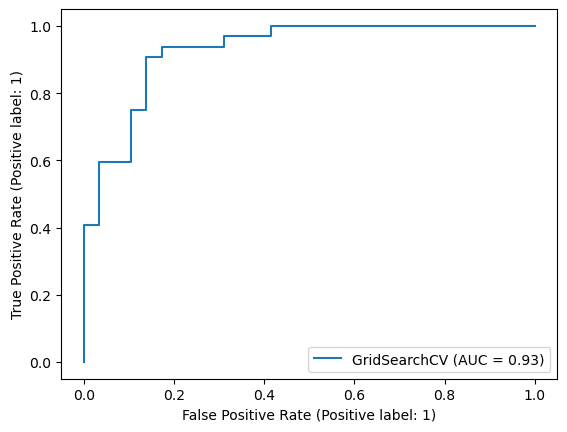

In [42]:
# Step 2 . Plot ROC curve and calculate and calculate AUC metric by use plot_roc_curve(modelname,x_test,y_test)
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)# This is an update 2023 code


Perfect roc curve will be 1.0 , area under curve is 0.93 so our model not perfect 

## Confusion matrix

In [43]:
# Step 3. Find confusion matrix , result will turn in array

confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

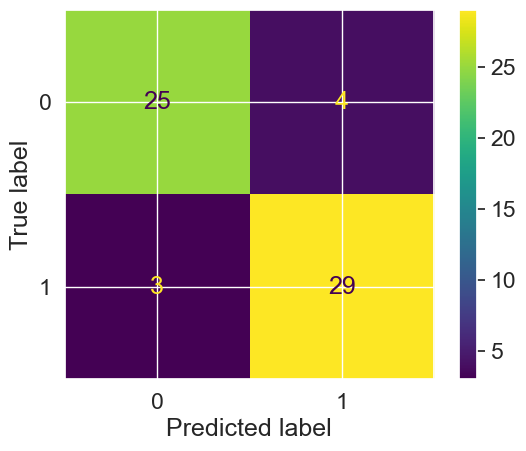

In [44]:
# Step 4  create a nice looking confusion matrix Using Seaborn's heatmap() with short cut

sns.set(font_scale=1.5)
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

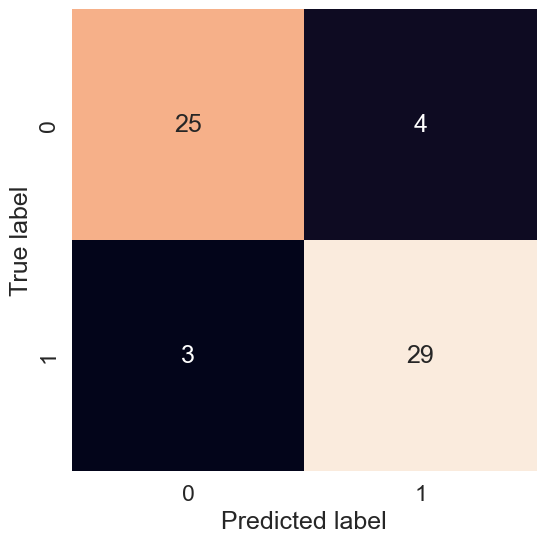

In [45]:
# step 4.1 ploting cinfusion matrix from fix, ax

# Import Seaborn
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)



3,4 is the both thing that we want to avoid.Especially when somethinh like heart disease prediction,even predicting not present.

# Classification report ,Cross-validates precision,Recall and F1-score1



## Classification report:
1. Need to do with cross validation score
1. will give us precision recall and f1
2. Classification report 


In [46]:
# Get Classification report that ****only  calculate one one test split data (from the y_preds)

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



 ### Cross-validation 
 

In [47]:
# Step 1 check best hyperpameters by grid search . Because we want to set up best model then use cross validation on it to evaluate


gs_log_reg.best_params_

{'C': 0.18329807108324356, 'solver': 'liblinear'}

In [48]:
# step 2 create a new classifier with best parameters, or assinged to clf before we use it in cross_val_score

clf = LogisticRegression(C = 0.18329807108324356,
                        solver = "liblinear" )

In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y , cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

**Note** take a mean of score because it's evaluated our model over 5 different split `WE NEED TO TAKE MEAN OF IT`

In [50]:
# Take a Mean of array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75 ]) will get Average Accuracy across

np.mean(cv_acc) # find mean 
cv_acc = np.mean(cv_acc)# assinged it
cv_acc

0.8446994535519124

In [51]:
# Cross-validated precision in LogisticRegression model
np.random.seed(42)

cv_precision = cross_val_score(clf,x,y,cv = 5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

#Cross-Validated precision with RandomForestClassifier model

np.random.seed(42)

# การหาสกอของ cross validation cross_val_score(model,x,y,cv=how mant test split we want to see, coring = metrics that we want to finf )

cv_precision = cross_val_score(RandomForestClassifier(),x,y,cv = 5,scoring="precision")
cv_precision

In [52]:
# Cross-Validated recall

cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")#find score
cv_recall = np.mean(cv_recall)#find mean
cv_recall

0.9212121212121213

In [53]:
# Cross-Validate f1-score , 

cv_f1 = cross_val_score(clf , x, y, cv=5 , scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

**Note**F1 is mean of precision+recall.We take a mean of score because it's evaluated our model over 5 different split `WE NEED TO TAKE MEAN OF IT`

# Visualize cross-validated Metrics

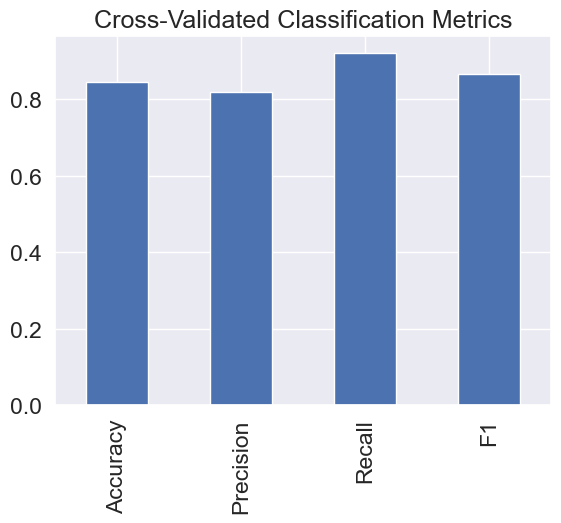

In [54]:
# Visualize cross-validated Metrics

# use data froms and put dictionay of all metrics on it
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0]) # needed to set index to 0

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                     legend=False);

# Saving and loading trained ML Model 
                                                   
                                                   

In [55]:
from joblib import dump,load
dump(cv_recall, filename="Cross_Validated_recall_LogisticRegression_classifier_model.joblib")

['Cross_Validated_recall_LogisticRegression_classifier_model.joblib']

In [56]:
#load model and check

cv_recall_model =load(filename="Cross_Validated_recall_LogisticRegression_classifier_model.joblib")

In [57]:
print(type(cv_recall_model))


<class 'numpy.float64'>


### Test prediction
cv_recall_model_preds = cv_recall_model.predict(x_test)

evaluate_preds(y_test, cv_recall_model_preds)

## Save by pickle


In [58]:
#3 option 1
import pickle
pickle.dump(rs_log_reg, open("heartdisease_model.sav","wb"))


In [59]:
load_model = pickle.load(open("heartdisease_model.sav","rb"))


In [69]:
# testing model
input_data = (57,1,0,130,131,0,1,115,1,1.2,1,1,3)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0):
    print('no heart disease')
else:
    print('find heart disease')

[0]
no heart disease


/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# check model
import numpy as np
import joblib

loaded_cv_recall_y_preds = loaded_cv_recall.predict(x_test)

evaluate_preds(y_test, loaded_cv_recall_y_preds)

In [61]:
from flask import Flask, request, render_template# our html template
import pickle

In [62]:
# Fit an instance of LogisticRegression

# step 1 check on beat params

# step 2 use the best param into model
clf = LogisticRegression( C= 0.18329807108324356 ,
                         solver="liblinear")

clf.fit(x_train,y_train);



In [63]:
#Check coef_ = tell us how each of theseh independent varible,so the (x_train data set like age, sex,cp...etc) x_train data set the coefficient contributes to our labels
clf.coef_

array([[ 0.00272339, -0.82298074,  0.64890874, -0.01155444, -0.00162806,
         0.04049912,  0.29695211,  0.02448383, -0.58096327, -0.56292017,
         0.43388048, -0.62422096, -0.66118006]])

In [64]:
# Match of fit coef's of feature to columns
#**Note: we take a coef which is attribute for our classifier, and take a column(age,sex,cp) from data frame and match them 

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0027233903552318184,
 'sex': -0.8229807387836141,
 'cp': 0.6489087436892185,
 'trestbps': -0.011554435645569492,
 'chol': -0.0016280609133975362,
 'fbs': 0.040499124086044315,
 'restecg': 0.29695211017640527,
 'thalach': 0.02448383369069631,
 'exang': -0.5809632692986864,
 'oldpeak': -0.5629201662982497,
 'slope': 0.43388047601765695,
 'ca': -0.6242209564790577,
 'thal': -0.6611800583852923}

<Axes: title={'center': 'Feature Important'}>

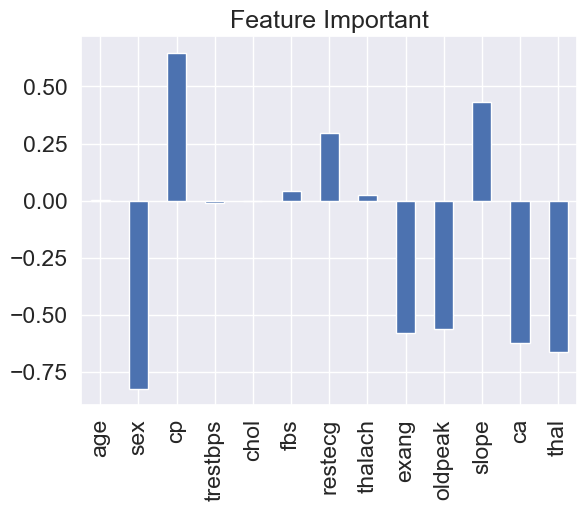

In [65]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Important",
                     legend =False)

This plot, in essence is how much each feature here contributes to predicting the target variable wwhter someone have heart disease or not. Coef is similar to corlerative

## Explor the coef data

when value of sex increse,the target value decreases because of the negative coefficient

In [66]:
# when value of sex increse,the target value decreases because of the negative coefficient

pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
# check slop fot positive coef mean if slope increse target will increse as well

pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment:

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart